In [6]:

# preparation block 
# calling the needed libraries and setting the constants values and path.
import xml.etree.cElementTree as ET
import pprint
import re
import codecs
import json
import datetime as dt


path = 'C:/Users/Here/DAND/'

mongoPath = 'C:/Program Files/MongoDB/'

mongoBinPath = 'C:/Program Files/MongoDB/Server/3.2/bin/'

osmFileName = 'riyadh_saudi-arabia.osm'

finalJsonFile = 'riyadh_.json'

### 1. Find abnormal keys

In [7]:


print dt.datetime.now(), ' start time' 
# to measure time because %time and %timeit didn't work as expected and 
# to save time I resorted to this simple way


# regular expression compilation.. most important is the problemchar; bec it will decide what to include
lower = re.compile(r'^([a-z]|_)*$')
lower_colon = re.compile(r'^([a-z]|_)*:([a-z]|_)*$')
problemchars = re.compile(r'[=\+/&<>;\'"\?%#$@\,\. \t\r\n]')


# Count tags and find problematic keys [Code is taken from the Udacity project excercises]
def count_tags(filename):
        
       
        
        
        keys = {"lower": 0, "lower_colon": 0, "problemchars": 0, "other": 0}
        for event, element in ET.iterparse(filename):
            if event == 'end':
                keys = key_type(element, keys)
               

       
        return keys


def key_type(element, keys):
    if element.tag == "tag":

        att = element.attrib
        k = att['k']
        v = att['v']
        #print k, '--', v
        
        counter = 0
        result = lower.search(k)
        if not result == None:
            keys['lower'] += 1
            counter+=1
                    
        
        result = lower_colon.search(k)
        if not result == None:
            keys["lower_colon"] += 1
            counter+=1
            
        result = problemchars.search(k)
        if not result == None:
            keys["problemchars"] += 1
            counter+=1
            print 'problematic key/value' ,k, ' : ', v
            
        
        if counter == 0 :
            keys['other'] +=1
        
    return keys


keys = count_tags(path + osmFileName)
print dt.datetime.now(), ' END time'


print "keys :"
pprint.pprint(keys)

print '-----------'





2016-04-01 17:10:54.592000  start time
problematic key/value name 12/30  :  unclassified
2016-04-01 17:11:00.965000  END time
keys :
{'lower': 128621, 'lower_colon': 3155, 'other': 387, 'problemchars': 1}
-----------


### 2. Have a look at the keys in the tag nodes for eye scanning

In [8]:

print dt.datetime.now(), ' start time' 



# find unique keys in the tags elements and have a look at them 
def findUniqueKeys(filename):
        
       
        
        tagKeys = set()# a set() so that only unique values are stored
        
        for event, element in ET.iterparse(filename):
            if event == 'end':
                if element.tag == 'tag':
                    tagKeys.add(element.attrib['k'])
                   
                        
                            

       
        return tagKeys





tagKeys = findUniqueKeys(path + osmFileName)
print dt.datetime.now(), ' END time'


print " [", len(tagKeys),'] Unique keys :'
pprint.pprint(tagKeys)

print '-----------'




2016-04-01 17:11:13.995000  start time
2016-04-01 17:11:17.938000  END time
 [ 421 ] Unique keys :
set(['FIXME',
     'Fixme',
     'Fixme:de',
     'ISO3166-1',
     'ISO3166-1:alpha2',
     'ISO3166-1:alpha3',
     'ISO3166-1:numeric',
     'ISO3166-2',
     'Transport',
     'abandoned',
     'abandoned:highway',
     'access',
     'addr:city',
     'addr:country',
     'addr:housename',
     'addr:housenumber',
     'addr:postcode',
     'addr:province',
     'addr:state',
     'addr:street',
     'addr:suburb',
     'admin_level',
     'aeroway',
     'alt_name',
     'alt_name:de',
     'alt_name:en',
     'alt_name:vi',
     'alt_name_gmap',
     'amenity',
     'amenity_1',
     'area',
     'artwork_type',
     'atm',
     'barrier',
     'bicycle',
     'boat',
     'border_type',
     'boundary',
     'bridge',
     'building',
     'building:color',
     'building:levels',
     'building:material',
     'building:part',
     'cables',
     'camp_type',
     'capacity',
   

### 3. Print values of the problematic keys

In [9]:

# print values of the suspected keys or problematic keys
def printValuesOfTheKey(filename, keyForValue):
        
        for event, element in ET.iterparse(filename):
            if event == 'end':
                             
                if element.tag == 'tag' and element.attrib['k'] == keyForValue:
                    #tagKeys.add(element.attrib['k'])
                    print element.attrib['v']
         
       
       




print dt.datetime.now(), ' start time' # to measure time

printValuesOfTheKey(path + osmFileName,'fixme')

print dt.datetime.now(), ' END time'


'''
result for printValuesOfTheKey(path + osmFileName, 'FIXME') was:

2016-02-27 19:41:06.155000  start time
One way?
One way?
One way?
One way?
One way?
Is the road finished from construction?
2016-02-27 19:41:10.730000  END time



--------------------

result for printValuesOfTheKey(path + osmFileName , 'name 12/30') was:

2016-02-27 19:43:03.575000  start time
unclassified
2016-02-27 19:43:06.936000  END time



----------------



result for printValuesOfTheKey(path + osmFileName ,u'\u0627\u0644\u0644\u0648\u064a\u0645\u064a')

2016-02-27 19:46:14.062000  start time
مؤسسه كشف تسربات المياه
2016-02-27 19:46:17.465000  END time





------------------

result for printValuesOfTheKey(path + osmFileName ,'fixme') was:


2016-02-27 19:48:50.129000  start time
Add local name
name
Check this is a fuel station
name
name
name
name
name
name
name
name
surface
name
name
does this road exist?
yes
yes
yes
check bridge
2016-02-27 19:48:53.560000  END time



'''
print ' '

2016-04-01 17:11:28.822000  start time
Add local name
name
Check this is a fuel station
name
name
name
name
name
name
name
name
surface
name
name
does this road exist?
yes
yes
yes
check bridge
2016-04-01 17:11:32.567000  END time
 


### 4. Get the parent element of a tag element; to know the user

In [10]:



# extract parent elements by keys so we can extract the userID and user name
def extractParentElementsByKey(filename, key):
       
        elList =[]
        flag = False
        
        for event, element in ET.iterparse(filename):
            if event == 'end':
                if flag == True:
                    if element.tag == 'node' or element.tag == 'way' or element.tag == 'relation':
                        elList.append(element)
                        flag=False
               
                if element.tag == 'tag':
                    if element.attrib['k'] == key:
                        flag = True
                        
                            


        #debugging
        #for e in  elList:
            #print 'user: ',e.attrib['user'], 'uid: ', e.attrib['uid']

        return elList

    
    
    


Elems =  extractParentElementsByKey(path + osmFileName , 'name 12/30')

uids = []
for el in Elems:
    uids.append('uid: '+el.attrib['uid']+', user: '+ el.attrib['user'])
#     for i in el.attrib:
#         print i,' : ', el.attrib[i]

    

# This is a neat library (collections.Counter) that change the List of element 
# into a dictionary with count for each element repeated in the the list
from collections import Counter
countIds = Counter(uids)


for k in countIds :
    print k, '... Count: ', countIds[k]
    
    
    
'''
result for extractParentElementsByKey(path + osmFileName , 'fixme') was:


uid: 192395, user: BBO ... Count:  1
uid: 1731253, user: keepright! ler ... Count:  1
uid: 550560, user: Seandebasti ... Count:  14
uid: 1203657, user: Jan van Bekkum ... Count:  1
uid: 2350162, user: tiljes ... Count:  1
uid: 474183, user: ratrun ... Count:  1


----------------


result for extractParentElementsByKey(path + osmFileName, 'name 12/30') was:



uid: 111462, user: Bot45715 ... Count:  1

'''
print ''

uid: 111462, user: Bot45715 ... Count:  1



### 5. Check the postcodes for errors

In [11]:

#check if the postal codes are not valid; using the guidelines from the saudi post
# located here: http://www.address.gov.sa/en/address-format/zip-code
# notice that the postal code should be 5 digits starting with '1'

def findPostalCodeErrors(filename, keyForValue):
   
        pc = re.compile('^1\d{4}$')
        
        elList=[]
     
        flag = False
        for event, element in ET.iterparse(filename):
            if event == 'end':
                if flag == True:
                    if element.tag == 'node' or element.tag == 'way' or element.tag == 'relation':
                        elList.append(element)
                        flag=False
                if element.tag == 'tag':
                    if element.attrib['k'] == keyForValue :
                        result = pc.match( element.attrib['v'])
                        
                        if not result:
                            print element.attrib['v']
                            flag = True
                            
                        
        return elList
    
    
    
elements = findPostalCodeErrors(path + osmFileName, 'addr:postcode')                

for i in elements:
    print i.tag, 
    print 'uid = ',i.attrib['uid']
    for sub in list(i):
        try:
            
            print sub.attrib['k'],' : ', sub.attrib['v']
        except:
            pass
    print '\n.....\n'


    
    

    
    

    

54033
12783-8458
12393 4057
node uid =  5359
name  :  Davide
shop  :  electronics
addr:city  :  Carrara
addr:state  :  TOSCANA
wheelchair  :  yes
addr:street  :  Via Provinciale Avenza-sarzana
addr:country  :  IT
addr:postcode  :  54033
addr:province  :  Massa Carrara
addr:housenumber  :  69

.....

node uid =  1936310
name  :  تموينات الحارثي
shop  :  convenience
addr:city  :  Riyadh
addr:street  :  شارع معاوية بن أبي سفيان
addr:postcode  :  12783-8458
opening_hours  :  8:00-23:59
addr:housename  :  محلات سلطان المالكي
addr:housenumber  :  3105

.....

node uid =  618113
name  :  Elixir Bunn Coffee Roasters
phone  :  +966 57 090 8181
amenity  :  cafe
cuisine  :  coffee_shop
name:ar  :  اكسير البن
smoking  :  no
website  :  http://elixirbunn.com
addr:city  :  Riyadh
addr:street  :  Salim Ibn Maqil, An Nakhil
addr:postcode  :  12393 4057
opening_hours  :  9pm-1am
internet_access  :  yes
addr:housenumber  :  7179

.....



### 6. Find the nodes entered by the specific userID, for inspection

In [15]:


# find user nodes and inspect them to notice the input errors; if any
def findUserNodes(filename, userID):

        
        uid = 0
        elList =[]
        
        for event, element in ET.iterparse(filename):
            if event == 'end':
                if 'uid' in element.attrib.keys() and  element.attrib['uid'] == userID:
                    uid +=1
                    elList.append(element)
                

                
        print 'total elements = ', uid
        
        return elList
    
    
       
        
    
        
# if the user node list returned is so large then printing it would clog the browser by creating a very large DOM nodes
# bec I am using Ipython Notebook on the browser [jupyter]
# so to prevent this the following method will take the list and return a chunk of the list  based on the parameters given

def giveMeChunkOfTheList(theList, theChunk, thePart = 0):
    '''
    this method takes a List and return a sliced list
    the size of the slice is decided by the parameter theChunk
    the location of the chunk taken from the origional list is decided by thePart parameter
    '''
    l = len(theList)
    partsCount = 0 
    remainder = 0
    
    #make sure the length of the list is larger than the chunk
    # and when that is confirmed then divide the list length by the chunk length
    if l >  theChunk:
        partsCount = l/ theChunk
        remainder = l% theChunk
    else:
        print "Error: The Max parameter(",  theChunk ,") is larger than the List : ", l
        
    
    # make sure the part the user want to view is within the limit (parsCount)
    if thePart > partsCount -1 :
        print "Error: The part parameter(", thePart ,") is larger than the List parts : ",\
        partsCount-1, " (zero-based count)"
        thePart = 0
    
    
    firstLimit = thePart * theChunk
    secondLimit = thePart * theChunk +  theChunk
    theNewList = theList[firstLimit:secondLimit]
    theRemainderList = theList[partsCount*theChunk:]
    
    #print notification so the user can adjust the size of the chunk or which part he wants from the list
    print "The List length = ", l, ", and it is divided into = ", partsCount,\
    " parts based on the chunk parameter you entered : ",\
    theChunk, " and the part that is returned to you is specified by the last parameter (i.e. [zero-based] thePart + 1 :",\
    thePart+1, "). The remainder of the list after dividing it into chunks = ", len(theRemainderList), " items"
    
    return theNewList,theRemainderList
    
    
    

    
# ------------------------------------------------




# this returns all users node
allUserNodes = findUserNodes(path + osmFileName, '5359')


# in case the users node are large we can view them in chunks so that the browser won't stop responding 
# by creating large DOM nodes.
allUserNodesChunk , remainderChunk = giveMeChunkOfTheList(allUserNodes, 100, 0)

   

    
# Now view the user nodes chunk    
for i in allUserNodesChunk:
            print '\n*************\n',\
            i.tag, i.attrib,\
            '\n*************\n'
            for sub in list(i):
                try:
                    if sub.tag == 'tag':
                        print '.............', sub.attrib['k'],' : ', sub.attrib['v']
                except:
                    pass

                
                
print '================================'              

# and this is for the remainder chunk that is not included in the parts of the main user nodes list
for i in remainderChunk:
            print '\n*************\n',\
            i.tag, i.attrib,\
            '\n*************\n'
            for sub in list(i):
                try:
                    if sub.tag == 'tag':
                        print '.............', sub.attrib['k'],' : ', sub.attrib['v']
                except:
                    pass
    
'''

truncated result  [truncated ] for findUserNodes(path +osmFileName, '5359') :

total elements =  146
The List length =  146 , and it is divided into =  1  parts based on the chunk parameter 
you entered :  100  and the part that is returned to you is specified by the last parameter
(i.e. [zero-based] thePart + 1 : 1 ). The remainder of the list after dividing it into chunks =  46  items

*************
node {'changeset': '29874448', 'uid': '5359', 'timestamp': '2015-03-31T12:02:53Z',
'lon': '46.6947681', 'version': '2', 'user': 'user_5359', 'lat': '24.6791285', 'id': '492937794'} 
*************


*************
node {'changeset': '29874448', 'uid': '5359', 'timestamp': '2015-03-31T12:02:53Z', 
'lon': '46.6937217', 'version': '2', 'user': 'user_5359', 'lat': '24.6786963', 'id': '492937828'} 
*************


*************
node {'changeset': '29874448', 'uid': '5359', 'timestamp': '2015-03-31T12:02:54Z', 
'lon': '46.6930152', 'version': '2', 'user': 'user_5359', 'lat': '24.6784039', 'id': '492937829'} 
*************


*************
node {'changeset': '15659083', 'uid': '5359', 'timestamp': '2013-04-08T20:01:03Z', 
'lon': '46.745276', 'version': '2', 'user': 'user_5359', 'lat': '24.596365', 'id': '2161647946'} 
*************

............. name  :  Davide
............. shop  :  electronics
............. addr:city  :  Carrara
............. addr:state  :  TOSCANA
............. wheelchair  :  yes
............. addr:street  :  Via Provinciale Avenza-sarzana
............. addr:country  :  IT
............. addr:postcode  :  54033
............. addr:province  :  Massa Carrara
............. addr:housenumber  :  69

*************
node {'changeset': '29310699', 'uid': '5359', 'timestamp': '2015-03-07T15:37:11Z', 
'lon': '46.6288735', 'version': '3', 'user': 'user_5359', 'lat': '24.6850368', 'id': '2373878089'} 
*************

............. name  :  Embassy of Italy
............. source  :  Embassy of Italy website
............. amenity  :  embassy
............. country  :  IT
............. name:de  :  Italienische Botschaft
............. name:en  :  Italian Embassy
............. name:it  :  Ambasciata d'Italia

*************
node {'changeset': '29874448', 'uid': '5359', 'timestamp': '2015-03-31T12:02:53Z', 
'lon': '46.6937801', 'version': '2', 'user': 'user_5359', 'lat': '24.6771981', 'id': '2667122968'} 
*************




'''
print ''

total elements =  146
The List length =  146 , and it is divided into =  1  parts based on the chunk parameter you entered :  100  and the part that is returned to you is specified by the last parameter (i.e. [zero-based] thePart + 1 : 1 ). The remainder of the list after dividing it into chunks =  46  items



### 7. Find the boundary of the city (Longitude and Latitude)

In [16]:
# find the GPS boundaries; to use them for validating the nodes in the osm file
# this GPS locations of all nodes should be within the boundary .. but if the file has been tampered with 
# by any user or a bug .. we may result in abnormal location
def findLonLatMinMax(filename):

        for event, element in ET.iterparse(filename):
            if event == 'end':
                if element.tag == 'bounds':
                    print element.attrib
              

    
findLonLatMinMax(path + osmFileName) 




{'minlat': '24.292', 'maxlon': '47.202', 'minlon': '46.227', 'maxlat': '25.098'}


### 8. As a precaution; check if any node location is outside the city which will means that the file has been tampered with.

In [17]:
# Check if there is any fault that lead to including a node inside the city while it is located somewhere else
def findLonLatErrors(filename):
   
                
        elList=[]
     
        minlat = 24.292
        maxlat = 25.098
        
        minlon = 46.227 
        maxlon = 47.202
        for event, element in ET.iterparse(filename):
            if event == 'end':
                if element.tag == 'node':
                    lon = float(element.attrib['lon'])
                    lat = float(element.attrib['lat'])
                    
                    if lon > maxlon or lon < minlon or lat > maxlat or lat < minlat:
                        elList.append(element)
                       
              
                            
                        
        return elList
    
    
    
elements = findLonLatErrors(path + osmFileName )                

print len(elements)
for i in elements:
    print i.tag, 
    print i.attrib
    for sub in list(i):
        try:
            print sub.attrib['k'],' : ', sub.attrib['v']
        except:
            pass
    print '\n.....\n'


    

    
    
'''
result :

0
'''
print ''

0



### 9. Clean data and project it to a dictionary object to be stored in json format

In [21]:

"""
Parts of this code is taken from the Udacity course excercises.
https://www.udacity.com/course/viewer#!/c-ud032-nd/l-768058569/e-865240067/m-863660253
"""


# the following are regEx compilations to validate the nodes
lower = re.compile(r'^([a-z]|_)*$')
addr_street = re.compile(r'^addr:([a-z]|_)+')
addr_street_type = re.compile(r'^addr:([a-z]|_)+:([a-z]|_)+')
street_type_re = re.compile(r'\b\S+\.?$', re.IGNORECASE)
problemchars = re.compile(r'[=\+/&<>;\'"\?%#$@\,\. \t\r\n]')
pc = re.compile('^1\d{4}$')




# This dictionary is used to correct street naming in the nodes
mapping = { "St": "Street",
            "St.": "Street",
            "Ave" : "Avenue",
            "Rd." : "Road"
          }

#The following list contains common namming words for streets and roads
expected = ["Street", "Avenue", "Boulevard", "Drive", "Court", "Place", "Square", "Lane", "Road", 
            "Trail", "Parkway", "Commons"]


# this list will be used to shape the node by creating a dictionary key 
# named created containing keys for all the list elements if available
CREATED = [ "version", "changeset", "timestamp", "user", "uid"]







# for each element in the file we will pass it to this metho
# this method utilizes other method to shape the nodes from the XML format to a dictionary object
# to be converted into Json object.
def shape_element(element):
    node = {}
    node['created']={}
    node['pos']=[0.0,0.0]
    node['node_refs']=[]
    node["address"]={}
    
    # we are interested into two types of nodes [ node and way ]
    if element.tag == "node" or element.tag == "way" :
        
        node['type'] = element.tag
        for el in element:
            if el.tag == 'tag':
                k, v , addr = processTag(el)
                if addr == 'addr':
                    node['address'][k] = v
                elif addr == 'other':
                    #it happens that some tag elements contains k="type" v="anyvalue"
                    #this would result into changing the main node['type'] key 
                    # so we end up with json object containig abnormal types keys
                    #this is why we have to check it up in the following line
                    if k == 'type':
                        node['type-userdefined']= v
                    else:
                        node[k] = v
                else:
                    return None
                    
                
            elif el.tag == 'nd':
                ref = processNd(el)
                node['node_refs'].append(ref)
                
                
        # setting the node created keys and GPS location
        for a in element.attrib:
            if a in CREATED:
                node['created'][a]= element.attrib[a]
            elif a == 'lat':
                node['pos'][0]= float(element.attrib[a])
            elif a == 'lon':
                node['pos'][1]= float(element.attrib[a])
            
            elif a == 'type':
                node['type-userdefined']= element.attrib[a]
            
            else: 
                node[a]= element.attrib[a]
        
    
    
        # Cleaning
        if len(node['created']) == 0 :
            del node['created']
        if len(node['pos']) == 0 :
            del node['pos']
        if len(node['node_refs']) == 0 :
            del node['node_refs']
        if len(node["address"]) == 0 :
            del node["address"]
        
            
        return node    
            
    else:
        return None


    
    
# processing any tag element inside the nodes and converting the key value pair into dictionary keys with value
def processTag(el):
        k = el.attrib['k']
        v = el.attrib['v']
        
       
        # problemchars is already a global variable.. it is mentioned as a comment here as a reminder
        # problemchars = re.compile(r'[=\+/&<>;\'"\?%#$@\,\. \t\r\n]')
        result = problemchars.search(k)
        if result :
           
            return None, None, None
            #print 'problematic  re....', result.group()

            
            
        # addr_street_type is already a global variable.. it is mentioned as a comment here as a reminder
        # addr_street_type = re.compile(r'^addr:([a-z]|_)+:([a-z]|_)+')

        result = addr_street_type.search(k)
        if  result :
            
            return None, None, None
       
        
        # pc and addr_street are already a global variables .. they are mentioned as comment here as a reminder
        # addr_street = re.compile(r'^addr:([a-z]|_)+$')
        # pc = re.compile('^1\d{4}$')  

        result = addr_street.search(k)
        if  result :
            if k.find('street') > -1:
                v = update_name(v, mapping)
                
            if k.find('postcode') > -1:
                r = pc.match(v)
                if not r:
                    #try to clean the extra digits
                    v = update_postalcode( v )
                    if not v:
                        return None, None, None
                
            return k[5:], v , 'addr'
            
            
        
        # lower is already a global variable.. it is mentioned as a comment here as a reminder
        #lower = re.compile(r'^([a-z]|_)*$')
    
        result = lower.search(k)
        if  result:
            
            return k, v , 'other'
            
 
  
      
  

        return None, None, None



# This is to correct street names if they are written in abbreviations
# this method utilzed the dictionary mapping declared in the beginning.
def update_name(name, mapping):

    # street_type_re is already a global variable.. it is mentioned as a comment here as a reminder
    # street_type_re = re.compile(r'\b\S+\.?$', re.IGNORECASE)
    n = street_type_re.search(name)
    
    if n:
        wanted = n.group()
        if wanted in mapping:
            name = street_type_re.sub(mapping[wanted],name)
            
    
    return name


# This method will try to find a valid postal code and remove the suffix digits
def update_postalcode( code ):
    pc = re.compile('^1\d{4}') 
    r = pc.match(code)
    
    if r:
        end = r.end()
        # remove the extra digits and return
        return code[:end]
    else:
        # The postal code value is not a valid one
        print 'This is a wrong postal code, not repairable'
        return None
    
    
def processNd(el):
    ref = el.attrib['ref']
    
    return ref




# here is the main method that takes the file and process it and save it into a json file
def process_map(file_in, pretty = False):
    counter = 0
    file_out = "{0}.json".format(file_in)
    data = []
    with codecs.open(file_out, "w") as fo:
        for _, element in ET.iterparse(file_in):
            counter += 1
            el = shape_element(element)
            
            if el:
                data.append(el)
                if pretty:
                    fo.write(json.dumps(el, indent=2)+"\n")
                else:
                    fo.write(json.dumps(el) + "\n")
    
    # for debugging
    print 'Element found: ',counter, ' -- Dictionary items count: ', len(data)
    
    return data



d = process_map(path + osmFileName,False)      
# you can inspect 'd' which is the data elements extracted

This is a wrong postal code, not repairable
Element found:  982199  -- Dictionary items count:  390460


### 10. Small fix to the json file

In [22]:

'''
the resultant file 'riyadh_saudi-arabia.osm.json' is not a valid json object. It is rather a
text file containing multiple lines, where each line is a valid json object.


We have two options here:
A- Using the mongodb shell to import this file. it works fine on this file.
https://docs.mongodb.org/manual/reference/program/mongoimport/ 

B- Convert these lines of json objects into a json object 
 i.e. array of json objects 
 the algorithm is easy to prefix it with '[' character and append it with ']' charachter and insert ',' 
 charachter at the end of each line
 
 after this i checked the result object against: http://jsonlint.com/


the reason i picked scenario B is that I would like to try pyMongo as much as I can
'''
with open(path + 'riyadh_saudi-arabia.osm.json', "r") as fi:
    with open(path + finalJsonFile, "w") as fo:
        fo.write('[')

        
        firstTime = True
        while True:
            if firstTime:
                line = fi.readline()
                nextLine = fi.readline()
                if nextLine:
                    fo.write(line + ',')
                else:
                    fo.write(line + ']' )
                    break
                firstTime = False
            else:
                line=nextLine
                nextLine = fi.readline()

                if nextLine:
                    fo.write(line + ',')
                else:
                    fo.write(line + ']' )
                    break

        

       
            
    

### 11. Start inserting the nodes into the MongoDB

In [23]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017")


print 'Databases available on this device : ', client.database_names()


db = client.riyadh_osm
with open(path + 'riyadh_.json', "r") as f:
    content = json.load(f)
    db.osm.insert_many(content)
    
    
print 'Number of items inserted in the DB: ', db.osm.count()

Databases available on this device :  [u'examples', u'local', u'test']
Number of items inserted in the DB:  390460



### 12. Some statistics using both PyMongo and the mongo shell

In [24]:
print 'Collection osm size = ', db.command("collstats","osm")['storageSize']/1024, 'KB'


'''
using mongo shell we get the same result:

> db.osm.stats(1024)
{
        "ns" : "riyadh_osm.osm",
        "count" : 390460,
        "size" : 92644,
        "avgObjSize" : 242,
        "storageSize" : 24808,
        "capped" : false,
        "wiredTiger" : {
                ........[truncated here ]
'''

print 

Collection osm size =  24808 KB



In [25]:

# Is there a difference between the db and collection ( since the db has only one collection)?
print 'Database storage size = ', db.command("dbstats")['storageSize']/1024, 'KB'


'''
using the mongo shell we get the same results

> db.stats(1024)
{
        "db" : "riyadh_osm",
        "collections" : 1,
        "objects" : 390460,
        "avgObjSize" : 242.96465707114686,
        "dataSize" : 92644.51171875,
        "storageSize" : 24808,
        "numExtents" : 0,
        "indexes" : 1,
        "indexSize" : 3224,
        "ok" : 1
}

'''
print

Database storage size =  24808.0 KB



In [26]:
# Count node types

nodesCount = db.osm.find({'type':'node'}).count()
waysCount = db.osm.find({'type':'way'}).count()
print 'Nodes count = ', nodesCount 
print 'Ways count = ', waysCount
print 'Total = ' , nodesCount + waysCount

# to confirm my calculations are correct
print 'Total = ', db.osm.count()

print 'nodes percentage = ', 100*(float(nodesCount)/(nodesCount + waysCount)),' %'

'''

This can be done through the mongo shell as the following:
> db.osm2.group({key:{type:1}, reduce:function( curr, result) {result.count ++}, initial: {count: 0}})
[
        {
                "type" : "node",
                "count" : 318312
        },
        {
                "type" : "way",
                "count" : 73520
        }
]
>
'''

print

Nodes count =  317701
Ways count =  72759
Total =  390460
Total =  390460
nodes percentage =  81.3658249244  %



In [27]:
# Count node types using the aggregate function
list(db.osm.aggregate([{"$group":{"_id": "$type", "count":{"$sum": 1}}}]))

[{u'_id': u'node', u'count': 317701}, {u'_id': u'way', u'count': 72759}]

In [28]:
# Count types of amenities..
amenities = list(db.osm.aggregate([{"$match":{"amenity":{"$exists":1}}},{"$group":{"_id": "$amenity",\
            "count":{"$sum": 1}}}, {"$sort": {"count": -1}}]))
print len(amenities)
amenities

47


[{u'_id': u'place_of_worship', u'count': 978},
 {u'_id': u'parking', u'count': 726},
 {u'_id': u'school', u'count': 219},
 {u'_id': u'fuel', u'count': 210},
 {u'_id': u'restaurant', u'count': 112},
 {u'_id': u'fast_food', u'count': 48},
 {u'_id': u'cafe', u'count': 39},
 {u'_id': u'hospital', u'count': 37},
 {u'_id': u'embassy', u'count': 32},
 {u'_id': u'bank', u'count': 29},
 {u'_id': u'college', u'count': 28},
 {u'_id': u'atm', u'count': 20},
 {u'_id': u'pharmacy', u'count': 19},
 {u'_id': u'university', u'count': 18},
 {u'_id': u'car_rental', u'count': 15},
 {u'_id': u'toilets', u'count': 10},
 {u'_id': u'police', u'count': 10},
 {u'_id': u'fountain', u'count': 10},
 {u'_id': u'car_wash', u'count': 8},
 {u'_id': u'marketplace', u'count': 7},
 {u'_id': u'library', u'count': 7},
 {u'_id': u'shelter', u'count': 6},
 {u'_id': u'fire_station', u'count': 6},
 {u'_id': u'post_office', u'count': 5},
 {u'_id': u'exhibition_centre', u'count': 5},
 {u'_id': u'prison', u'count': 4},
 {u'_id': 

In [29]:
# Count number of users with nodes input for each
users = list(db.osm.aggregate([{"$group":{"_id": "$created.user", "count":{"$sum": 1}}}, {"$sort": {"count": -1}}]))
print 'Total users = ',len(users)
users[:80]



Total users =  282


[{u'_id': u'Seandebasti', u'count': 174192},
 {u'_id': u'Rub21', u'count': 44976},
 {u'_id': u'bauma', u'count': 30582},
 {u'_id': u'Cicerone', u'count': 27862},
 {u'_id': u'hsarslan', u'count': 17825},
 {u'_id': u'keepright! ler', u'count': 10692},
 {u'_id': u'Dugoon', u'count': 8922},
 {u'_id': u'Khaled AlOtaibi', u'count': 7874},
 {u'_id': u'Majdi', u'count': 5665},
 {u'_id': u't_woelk', u'count': 4260},
 {u'_id': u'derden', u'count': 3237},
 {u'_id': u'RichRico', u'count': 2916},
 {u'_id': u'Maarten Deen', u'count': 2457},
 {u'_id': u'lamo_chan', u'count': 2390},
 {u'_id': u'Bot45715', u'count': 2209},
 {u'_id': u'AndrewBuck', u'count': 2158},
 {u'_id': u'MonkZ', u'count': 2097},
 {u'_id': u'Jan van Bekkum', u'count': 1942},
 {u'_id': u'spremberger', u'count': 1788},
 {u'_id': u'FilipeAguiar', u'count': 1761},
 {u'_id': u'ediyes', u'count': 1721},
 {u'_id': u'akirasujin', u'count': 1622},
 {u'_id': u'dmgroom_ct', u'count': 1592},
 {u'_id': u'Ameer', u'count': 1521},
 {u'_id': u'mus

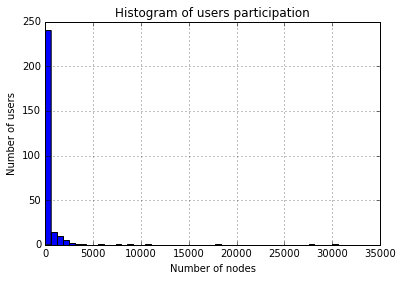

,_id,count
2,bauma,30582
3,Cicerone,27862
4,hsarslan,17825
5,keepright! ler,10692
6,Dugoon,8922
7,Khaled AlOtaibi,7874
8,Majdi,5665
9,t_woelk,4260
10,derden,3237
11,RichRico,2916


In [30]:
# We will draw a histogram but we should remove the outliers
# and yet the curve is skewed.
# Because most of the items are input by afew users.

import pandas as pd
import matplotlib.pyplot as plt
theLength = len(users)

%matplotlib inline



c = pd.Series([n['count'] for n in users])
m =  c.mean()
std =  c.std()

std3 = 3* c.std()
 

df = pd.DataFrame(users)
df

newDf = df[abs(df['count']-m)< std3]
newDf.hist(bins=50)
plt.xlabel('Number of nodes')
plt.ylabel('Number of users')
plt.title('Histogram of users participation')
plt.show()
newDf


### 13. Investigate the nodes in the database

In [31]:
# find bot users ( by name )

botre = re.compile('bot')

for i in users:
    if botre.match(i['_id'].lower()):
        print i['_id'], ' with : ',i['count'], 'items input'
        

Bot45715  with :  2209 items input


In [32]:
#Investigate the user nodes, for any user that is suspicious
usernodes = list( db.osm.find({"created.user": "Bot45715"}))

print len(usernodes)


usernodes[:10]

2209


[{u'_id': ObjectId('56fe873ffa05003a08f4aa01'),
  u'created': {u'changeset': u'22240688',
   u'timestamp': u'2014-05-09T21:44:29Z',
   u'uid': u'111462',
   u'user': u'Bot45715',
   u'version': u'4'},
  u'id': u'27403343',
  u'pos': [24.7073224, 46.7246654],
  u'type': u'node'},
 {u'_id': ObjectId('56fe873ffa05003a08f4aa02'),
  u'created': {u'changeset': u'22240688',
   u'timestamp': u'2014-05-09T21:44:29Z',
   u'uid': u'111462',
   u'user': u'Bot45715',
   u'version': u'2'},
  u'id': u'27403346',
  u'pos': [24.7060009, 46.726009],
  u'type': u'node'},
 {u'_id': ObjectId('56fe873ffa05003a08f4aa04'),
  u'created': {u'changeset': u'22240688',
   u'timestamp': u'2014-05-09T21:44:29Z',
   u'uid': u'111462',
   u'user': u'Bot45715',
   u'version': u'2'},
  u'id': u'27403349',
  u'pos': [24.7133147, 46.7256307],
  u'type': u'node'},
 {u'_id': ObjectId('56fe873ffa05003a08f4aa05'),
  u'created': {u'changeset': u'22240688',
   u'timestamp': u'2014-05-09T21:44:29Z',
   u'uid': u'111462',
   u'us

In [33]:

# Investigate what type of religion are the places for worship??

lReligion = list(db.osm.find({"religion":{"$exists":1}}))
print 'length of the list = ', len(lReligion)
lReligion[:5]

length of the list =  975


[{u'_id': ObjectId('56fe873ffa05003a08f4dd79'),
  u'amenity': u'place_of_worship',
  u'created': {u'changeset': u'2441139',
   u'timestamp': u'2009-09-10T21:45:28Z',
   u'uid': u'52754',
   u'user': u't_woelk',
   u'version': u'1'},
  u'id': u'492884391',
  u'pos': [24.9400144, 46.6472055],
  u'religion': u'muslim',
  u'type': u'node'},
 {u'_id': ObjectId('56fe873ffa05003a08f50f74'),
  u'amenity': u'place_of_worship',
  u'created': {u'changeset': u'3003418',
   u'timestamp': u'2009-11-01T03:22:13Z',
   u'uid': u'52754',
   u'user': u't_woelk',
   u'version': u'1'},
  u'id': u'549652263',
  u'pos': [24.6274598, 46.7122482],
  u'religion': u'muslim',
  u'type': u'node'},
 {u'_id': ObjectId('56fe873ffa05003a08f50f79'),
  u'amenity': u'place_of_worship',
  u'created': {u'changeset': u'3003418',
   u'timestamp': u'2009-11-01T03:22:16Z',
   u'uid': u'52754',
   u'user': u't_woelk',
   u'version': u'1'},
  u'id': u'549652276',
  u'pos': [24.6271429, 46.7138083],
  u'religion': u'muslim',
  u'

In [34]:
list(db.osm.aggregate([{"$match":{"amenity":{"$exists":1},"amenity":"place_of_worship"}},\
                        {"$group":{"_id":"$religion", "count":{"$sum":1}}}]))

[{u'_id': u'muslim', u'count': 969}, {u'_id': None, u'count': 9}]

Numbers here are inconsistant and that is explained by the fact that the users input are inconsistant. For example, they  input 'place of worship' but then they don't input the religion !